## Binary classification (two parameters) with linear boundary
### 1 Neuron - numpy

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def display_solution(data,boundary,lineList,errList,epochs,ylim=None):
    
    #errors evolution
    graph_x = np.arange(0, epochs)
    graph_y = errList
    plt.plot(graph_x, graph_y)  
    plt.show()

    #data points and final line boundary
    X = data[:, [0,1]]
    Y = data[:, [2]]

    rows1 = data[data[:,2] == 1]
    rows0 = data[data[:,2] == 0]

    #w1 x1 + w2 x2 + b = 0
    #w1 x + w2 y + b = 0
    #y = (1/w2) * (-w1 x - b)
    w1 = n.boundary[0]
    w2 = n.boundary[1]
    b = n.boundary[2]

    minx = np.min(X[:,0])
    maxx = np.max(X[:,0])

    xx_line = np.linspace(minx,maxx,100)
    #or
    #xx.line =np.range(minx, maxx, 0.1)
    yy_line = (1/w2) * (-w1 * xx_line - b)

    plt.scatter(rows0[:,0],rows0[:,1])
    plt.scatter(rows1[:,0],rows1[:,1])

    #solutions evolution
    #plt.xlim(minx-1,maxx+1)
    if(ylim != None):
        plt.ylim(ylim)
    for line in lineList:
        w1 = line[0]
        w2 = line[1]
        b = line[2]
        minx = np.min(X[:,0])
        maxx = np.max(X[:,0])
        xx_line = np.linspace(minx,maxx,100)
        #xx.line =np.range(minx, maxx, 0.1)
        yy_line = (1/w2) * (-w1 * xx_line - b)

        plt.plot(xx_line, yy_line,'g:')
    #final solution line    
    plt.plot(xx_line, yy_line, 'r'); 

In [2]:
class Neuron:
    
    def __init__(self,data,learning_rate=0.01):        
        '''two input data: x1, x2 and y(target)'''
        self.data = data
        self.learning_rate = learning_rate
                
        self.X = data[:, [0,1]]
        self.Y = data[:, [2]]
        #adding 'ones' ('1') column for bias dot product
        self.X = np.append(self.X,np.ones([1,self.X.shape[0]]).T, axis=1)

        #making random predictable and reproductible
        np.random.seed(0)         
        
        #vector with random weights and bias(float between 0 and 1): w1, w2, b
        self.boundary = np.random.rand(1, 3)[0]

    def S(self): 
        #linear sum of weights (S = Wx+b)
        return self.X@self.boundary.reshape(self.boundary.shape[0],1)
 
    def sigmoid(self,s):
        #sigmoid function (return continuous values)
        return(1/(1+np.exp(-s)))

    def error(self):
        # Loss (cross entropy) error function
        # target and output probabilities from sigmoid function    
        y = self.Y
        y_hat = self.out
        #errors on every point
        self.errs = -np.log(y_hat) * y -np.log(1-y_hat) * (1-y)
        #total error 
        self.loss = np.mean(self.errs)
        
        return self.loss   
    
    def forward(self):
        #probabilities (out_data, prediction, y_hat)
        self.out = self.sigmoid(self.S())
        #loss
        self.error()
        return self.out
    
    def backward(self):
        #update weights using gradients
        
        d = np.append(self.data, self.out, axis=1)
        #iterate over matrix rows and update weights (boundary line coefs: w1, w2, b)
        #for idx, item in np.ndenumerate(d.T):
        #    print(idx, item)
        #or
        #scan order 'C': rows-columns ; scan order 'F': columns-rows
        it = np.nditer(d, flags=['multi_index'], order='C')
        for item in it:
            row = it.multi_index[0]
            col = it.multi_index[1]
            
            if(col==0):x1=item
            elif(col==1):x2=item
            elif(col==2):y=item
            elif(col==3):
                y_hat=item
                grad = -1 * (y-y_hat)
                self.boundary = self.boundary - self.learning_rate * grad * np.array([x1,x2,1])

In [25]:
def train(epochs,fv,ylim=None):
    errList = []
    lineList = []    
    last_loss = None
    for i in range(epochs):
        n.forward()
        n.backward()
        errList.append(n.loss)
        if(i%fv == 0):
            loss = n.loss
            print("\n========== Epoch", i,"==========")
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss) 
            last_loss = loss

            lineList.append(n.boundary)

            y = n.Y
            y_hat = n.out
            #y-hat(output) > 0.5 => point type 1 ; < 0.5 => point type 0
            accuracy = np.mean((y_hat > 0.5)==y)
            print("accuracy=",accuracy)

    print("final loss",n.loss)
    display_solution(data,n.boundary,lineList,errList,epochs,ylim)


========== Epoch 0 ==========
Train loss:  1.6984654125557117
accuracy= 0.4

========== Epoch 20 ==========
Train loss:  0.028629340730774434
accuracy= 1.0

========== Epoch 40 ==========
Train loss:  0.022296445323571785
accuracy= 1.0

========== Epoch 60 ==========
Train loss:  0.018252091593661545
accuracy= 1.0

========== Epoch 80 ==========
Train loss:  0.015448061790742573
accuracy= 1.0
final loss 0.013480327459088805


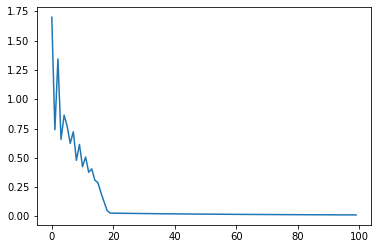

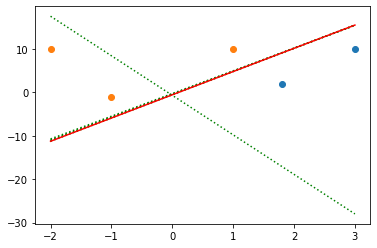

In [26]:
#array data points: x1, x2, y (target)
data = np.array([
    [1,10,1],
    [3,10,0],
    [1.8,2.0,0],
    [-1,-1,1],
    [-2,10,1],
])    

n = Neuron(data)
n.learning_rate = 0.1
n.boundary = np.array([-1,1,0])
    
train(100,20)    


========== Epoch 0 ==========
Train loss:  0.7410356303345168
accuracy= 0.2857142857142857

========== Epoch 20 ==========
Train loss:  0.5638386150024685
accuracy= 0.5714285714285714

========== Epoch 40 ==========
Train loss:  0.47667953725953416
accuracy= 0.7142857142857143

========== Epoch 60 ==========
Train loss:  0.4139205032655545
accuracy= 1.0

========== Epoch 80 ==========
Train loss:  0.3675435512470685
accuracy= 1.0
final loss 0.333848202628498


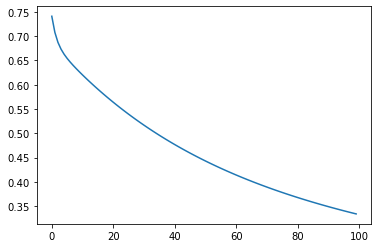

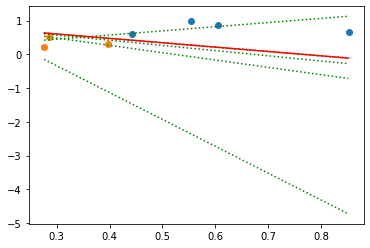

In [27]:
#array data points: x1, x2, y (target)

df = pd.read_csv('test.csv', header=None)
data = df.to_numpy()

n = Neuron(data)
n.learning_rate = 0.1
n.boundary = np.array([-1,1,0])
    
train(100,20)


========== Epoch 0 ==========
Train loss:  0.6909187772899672
accuracy= 0.52

========== Epoch 50 ==========
Train loss:  0.17028342446192185
accuracy= 0.92
final loss 0.1529073797965755


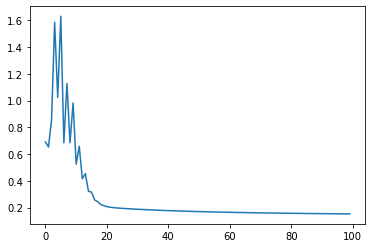

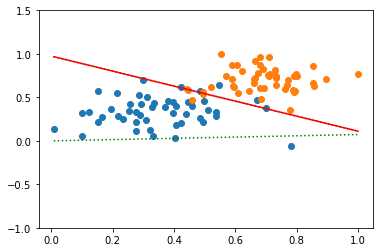

In [35]:
#array data points: x1, x2, y (target)

df = pd.read_csv('data2.csv', header=None)
data = df.to_numpy()

n = Neuron(data)
n.learning_rate = 0.1
n.boundary = np.array([-1,1,0])
    
train(100,50,[-1,1.5])